In [83]:
#fisrt we will extract the extract the file
# use index_col=0 to delete the automatic index from pandas  

import pandas as pd 
AICC =  pd.read_csv('Temperature Jouzel AICC.csv', index_col=0)
AICC

,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
bag,,,,,,
1,0,-50,-55,NaN,"218,3","3,105321"
2,"0,55","-43,55977","-50,51333333",NaN,"218,3","3,104805"
3,"1,1","-37,44019","-46,02666667",NaN,"218,3","3,104404"
4,"1,65","-31,64156","-41,54",NaN,"218,3","3,104025"
5,"2,2","-24,55278","-34,51666667",NaN,"218,3","3,103453"
...,...,...,...,...,...,...
5815,"3197,7","816871,6",817562,"-432,2",211,"1,529"
5816,"3198,25","817693,6",818631,"-431,4","211,2","1,548"
5817,"3198,8","818505,5",819700,"-430,3","211,3","1,576"


In [84]:
#extract 2 columns from dataset Temperature & AICC2012 which represents the years 
df = AICC[['temp', 'AICC2012']]
df

,temp,AICC2012
bag,,
1,"218,3",-55
2,"218,3","-50,51333333"
3,"218,3","-46,02666667"
4,"218,3","-41,54"
5,"218,3","-34,51666667"
...,...,...
5815,211,817562
5816,"211,2",818631
5817,"211,3",819700


In [89]:
#now we will follow the same steps to extract the CO2 (ppmv) & Gasage (yr BP)
#add skiprows because the because it's a string and we want to start counting from the first numeric row

import pandas as pd

CO2 = pd.read_csv('CO2.csv', skiprows=0)
dff = CO2[['Gasage (yr BP)','CO2 (ppmv)']]
dff


,Gasage (yr BP),CO2 (ppmv)
0,"-51,03","368,02"
1,"-48,00","361,78"
2,"-46,28","359,65"
3,"-44,41","357,11"
4,"-43,08","353,95"
...,...,...
1896,"803925,28","202,92"
1897,"804009,87","207,50"
1898,"804522,67","204,86"
1899,"805132,44","202,23"


>It's important to mention that exporting the data from xlsx to CSV was necessary in order to read tha data, once exported, the columns were easy to represent. However, once plotting the data it didn't show the results expected, after two days of trying to undertsand the reason why the plots looked messy, I understood that the numbers were exported as strings and not floats (due to quoation marks) so I added this to my script:  
- delimiter=',', decimal=','
>Reference: https://stackoverflow.com/questions/60398584/comma-in-numbers-causing-problem-reading-csv
            https://yardsale8.github.io/stat489_book/IntroductionToPython/DataTypesAndVariables.html#:~:text=What%20about%20values%20like%20%2217,in%20quotation%20marks%20like%20strings.&text=They're%20strings!   


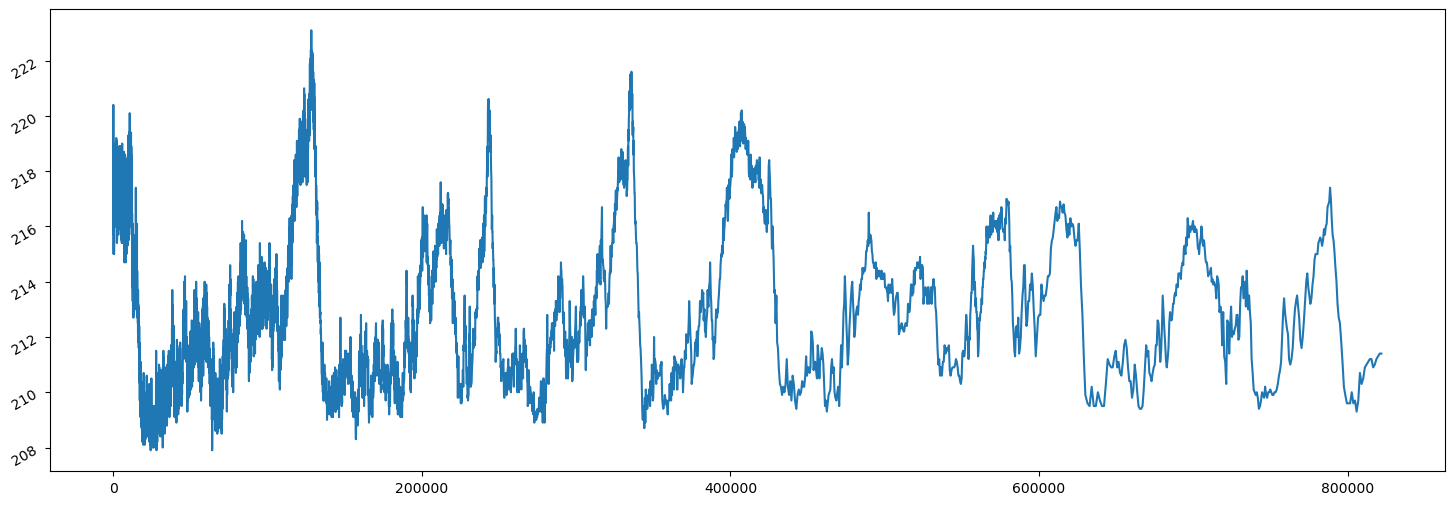

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('Temperature Jouzel AICC.csv', delimiter=',', decimal=',')

plt.figure(figsize=(18, 6))

# define X and Y axis
x_axis = data['AICC2012']
y_axis = data['temp']
plt.plot(x_axis, y_axis)

# Rotate and align x-axis tick labels
plt.yticks(rotation=30, ha='right')

plt.show()



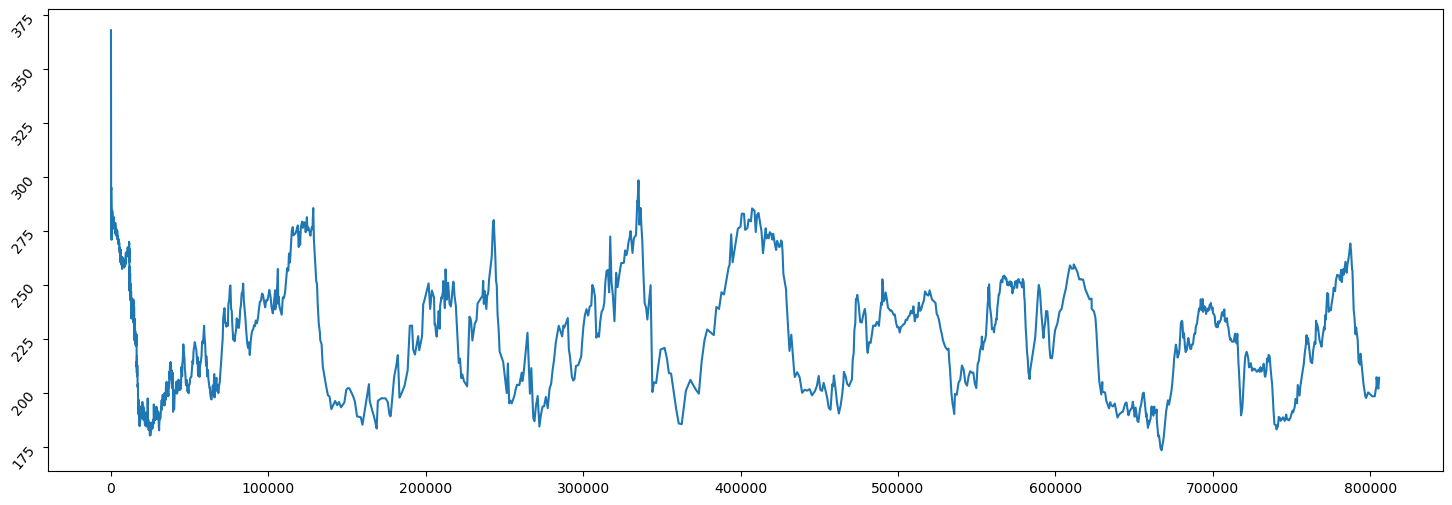

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file
CO2 = pd.read_csv('CO2.csv',delimiter=',', decimal=',')


# plotting Gasage (yr BP) vs CO2 (ppmv)
plt.figure(figsize=(18, 6))
x_axis = CO2['Gasage (yr BP)']
y_axis = CO2['CO2 (ppmv)']
plt.plot(x_axis, y_axis)


# Set y-axis ticks
#https://stackoverflow.com/questions/26700598/matplotlib-showing-x-tick-labels-overlapping 

plt.yticks(rotation=50, ha='right')


plt.show()


Now we will represent these two plots next to each other for a better view for comparison:

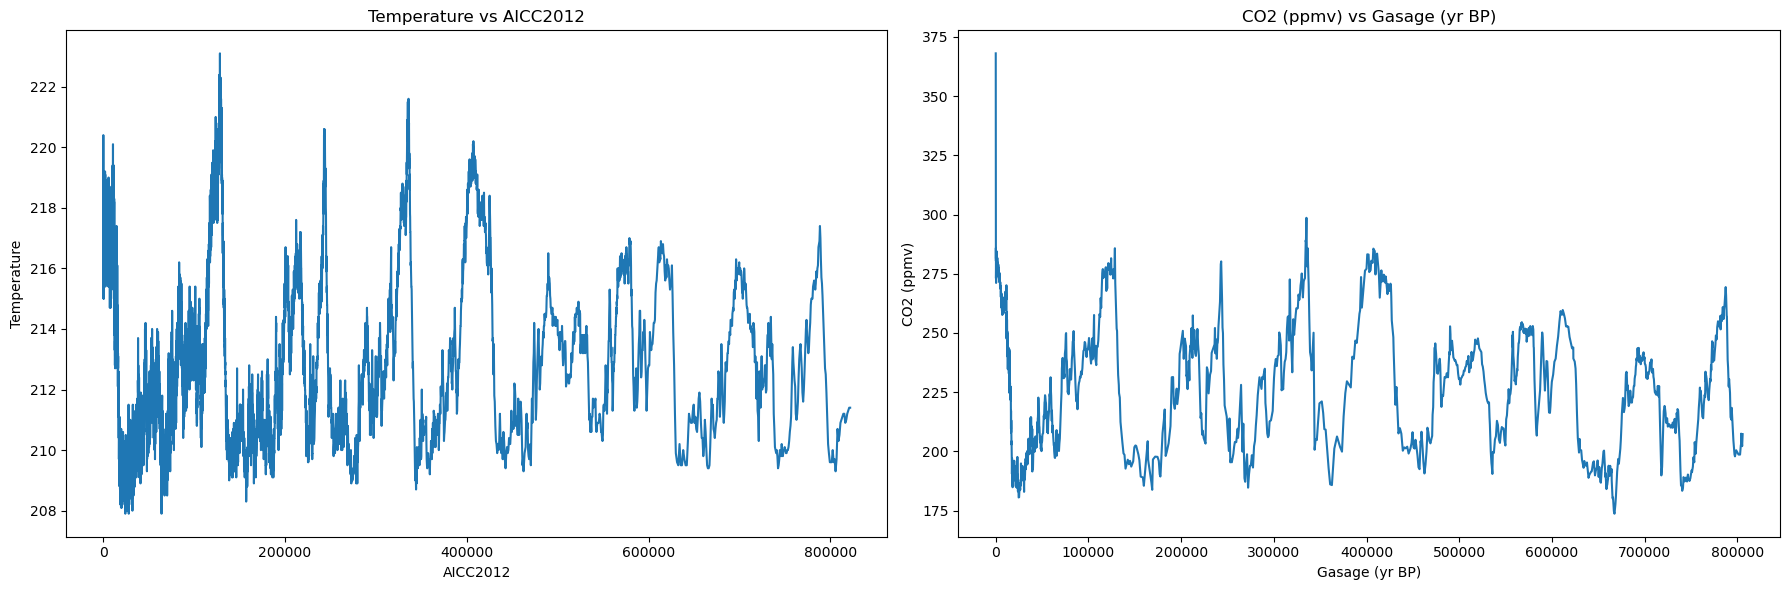

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

# Reference: https://www.tutorialspoint.com/how-to-make-two-plots-side-by-side-using-python

x1Points = data['AICC2012']
x2Points = CO2['Gasage (yr BP)']

y1Points = data['temp']
y2Points = CO2['CO2 (ppmv)']

plt.figure(figsize=(18, 6))

# For Plot 1: 
#1 represents the number of rows, 2 the number of columns & index the position of the subplot, in this case 1. 
plt.subplot(1, 2, 1)
plt.plot(x1Points, y1Points)
plt.title("Temperature vs AICC2012")
plt.xlabel('AICC2012')
plt.ylabel('Temperature')

# For Plot 2: 
plt.subplot(1, 2, 2)
plt.plot(x2Points, y2Points)
plt.title("CO2 (ppmv) vs Gasage (yr BP)")
plt.xlabel('Gasage (yr BP)')
plt.ylabel('CO2 (ppmv)')

plt.tight_layout()

plt.show()

Explain relationship between both graphs and CO2 vs Temperature

Now for the third paleo/moder feature we chose CH4 (Methane), datasets used:  
ATMOSPHERIC METHANE CONCENTRATIONS SINCE THE YEAR 1010  
https://datasource.kapsarc.org/explore/dataset/atmospheric-methane-concentrations-1010/information/  
PERIOD OF RECORD: 1010 to 1992

EPICA Dome C Ice Core 800KYr Methane Data
https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt 
PERIOD OF RECORD: 800 KYrBP to 1950

https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_mm_gl.txt
PERIOD OF RECORD: 1983 - 2023




Examining the Irish context using time series:

>Precipitations Ireland from 1711 to 2016  
>>Reference: https://www.met.ie/cms/assets/uploads/2018/01/Long-Term-IIP-1711-2016.zip 

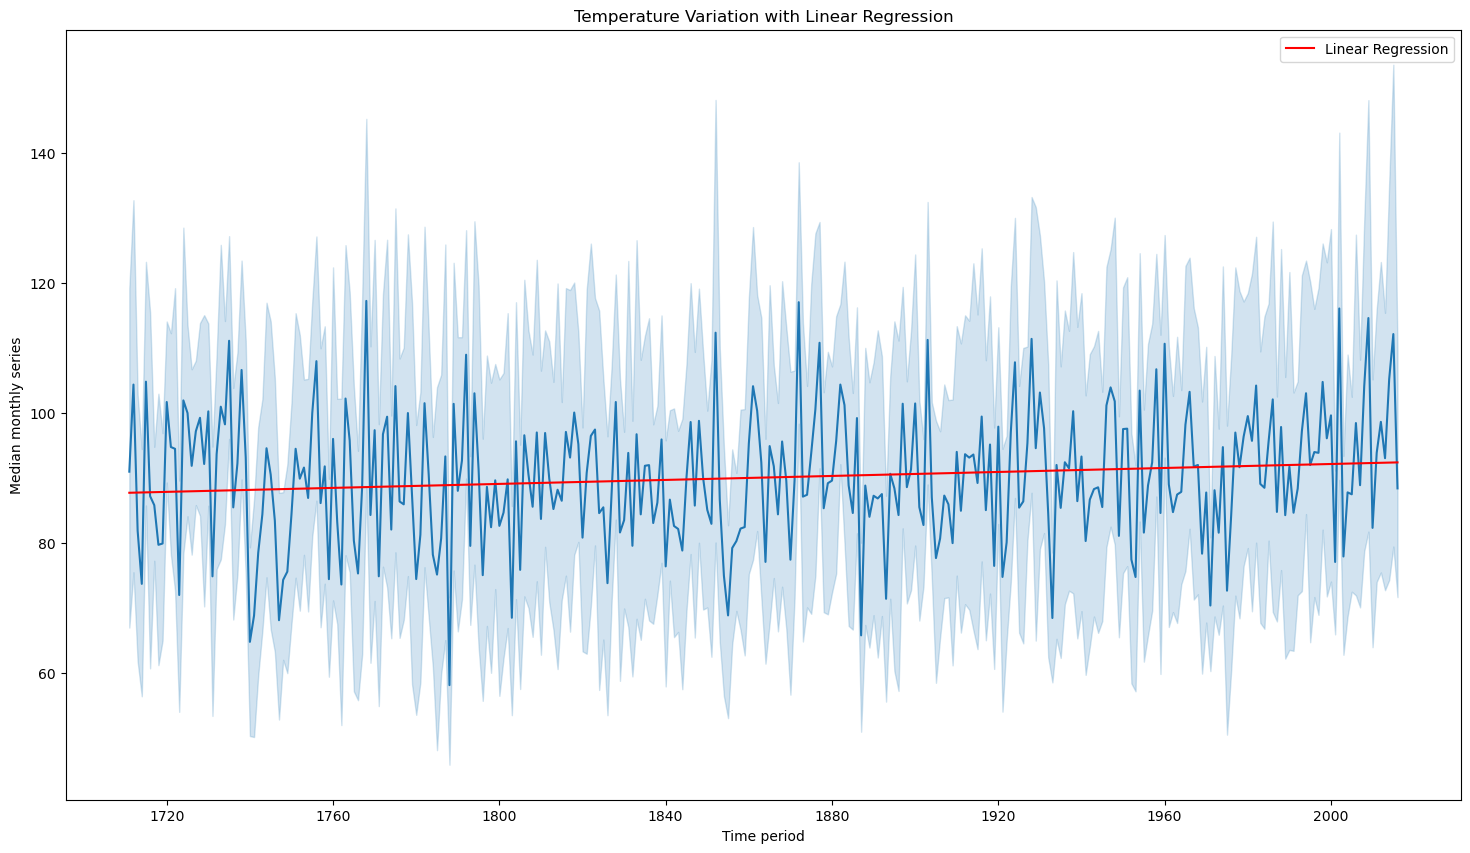

In [21]:
# precipitations Ireland from 1711 to 2016

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('Precipitations_ireland.csv')

#reference:https://sparkbyexamples.com/pandas/pandas-extract-year-from-datetime/#:~:text=You%20can%20use%20%25Y%20as,to%20convert%20String%20to%20Datetime.
pd.to_datetime(data['Year']).dt.year

# create new column for 'Year' to be displyed in datetime format
#reference:https://atlantictu-my.sharepoint.com/personal/brian_mcginley_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fbrian%5Fmcginley%5Fatu%5Fie%2FDocuments%2FTime%2Dseries%20%2D%20Dealing%20with%20datasets%2Emp4&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJTdHJlYW1XZWJBcHAiLCJyZWZlcnJhbFZpZXciOiJTaGFyZURpYWxvZyIsInJlZmVycmFsQXBwUGxhdGZvcm0iOiJXZWIiLCJyZWZlcnJhbE1vZGUiOiJ2aWV3In19&ga=1&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview 


#add .astype(str) to convert column values in string, important step if we want to use datetime()!
#https://sparkbyexamples.com/pandas/pandas-convert-datetime-to-string-format/  

data['Time period'] = pd.to_datetime(data['Year'].astype(str))

plt.figure(figsize=(18, 10))
sns.lineplot(data=data,x='Time period', y='Median monthly series')  # Scatter plot with relplot

#for the linear regression, the variable 'Yearr' must be converted to integer because it's saved in time format
#https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy 

m, intercept = np.polyfit(data['Time period'].astype(int), data['Median monthly series'], 1)
regression_line = m * data['Time period'].astype(int) + intercept

plt.plot(data['Time period'], regression_line, color='red', label='Linear Regression')


plt.title('Temperature Variation with Linear Regression')
plt.xlabel('Time period')
plt.ylabel('Median monthly series')
plt.legend()

plt.show()




>The plotted data reveals a consistent upward trend in precipitation over the past 300 years in Ireland. Notably, recent years show exceptionally higher precipitation levels which may potentially be linked to increasing temperatures as we can see in the temperature plot below, which gathers registerered temperatures in Ireland from 1958 to 2022:
>>Dataset source: https://data.cso.ie/table/MTM02 

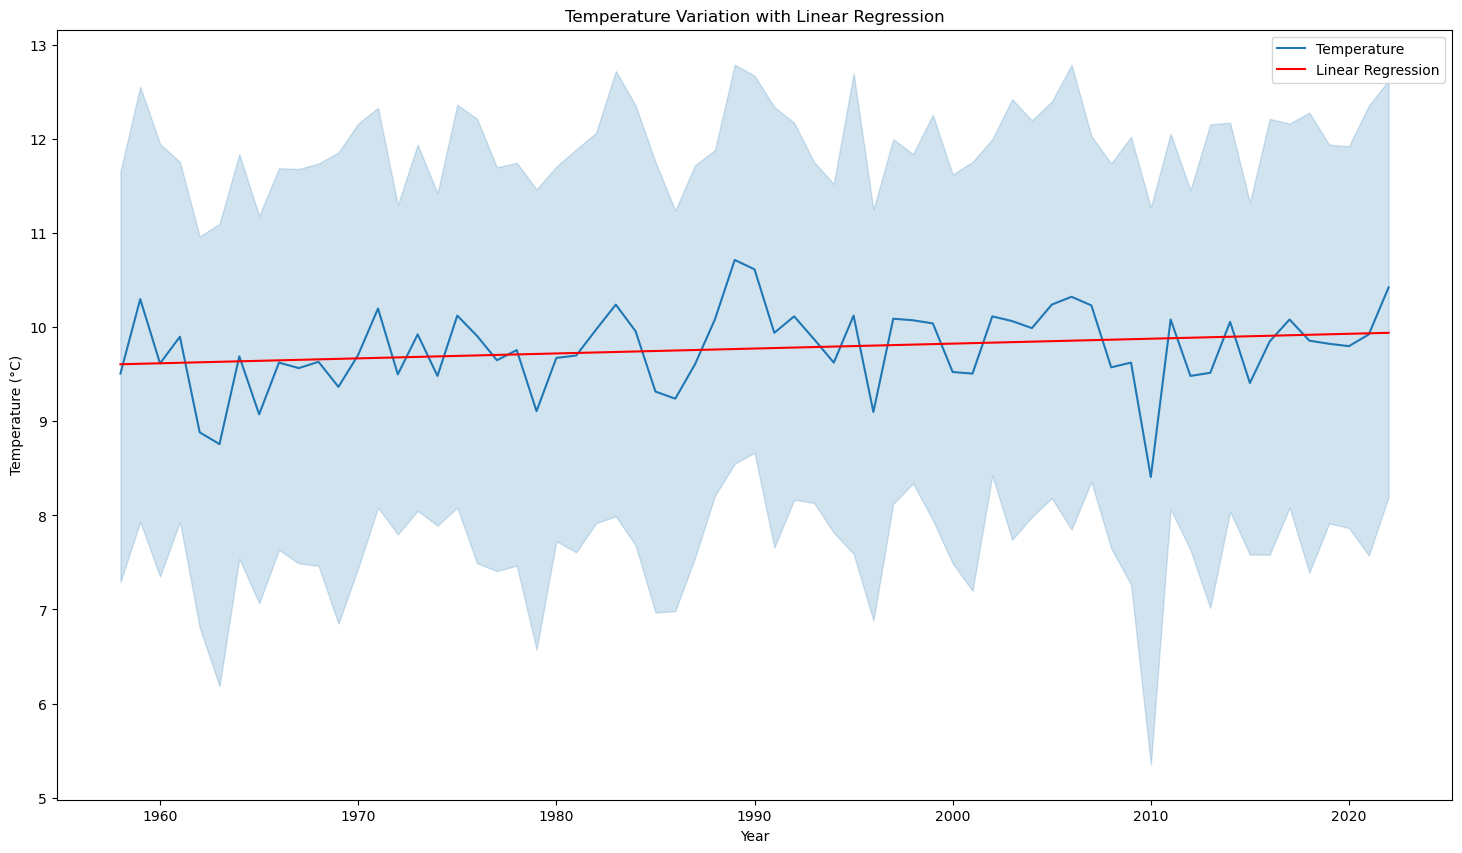

In [22]:
# Temperature Ireland from 1958 to 2022

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data
data = pd.read_csv('Temp_ireland.csv', delimiter=',', decimal=',')

# Convert 'Year' column to datetime
data['Yearr'] = pd.to_datetime(data['Year'].astype(str))

# Plot the temperature data
plt.figure(figsize=(18, 10))
sns.lineplot(data=data, x='Yearr', y='VALUE', label='Temperature')

# for the linear regression, the variable 'Yearr' must be converted to int
m, intercept = np.polyfit(data['Yearr'].astype(int), data['VALUE'], 1)
regression_line = m * data['Yearr'].astype(int) + intercept

# Plot the regression line
plt.plot(data['Yearr'], regression_line, color='red', label='Linear Regression')

# Set plot title and labels
plt.title('Temperature Variation with Linear Regression')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()


The linear regression trend indicates a gradual increase in temperatures over the last 60 years in Ireland. However, we can also identify peak temperatures in 1990 and minimum temperature levels in 2010 which indicates anomalies or extreme climatic conditions in the las two decades.